## 1) Exploratory Data Analysis (EDA) – 2p 

### 1.a. Describe the structure of the data: number of rows, columns, and data types. 

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data.csv")
df.head()


,Name,Project_Grade,Enrollment_Date,Procrastination_Index,Completed,Notifications_Checked,Average_Session_Duration_Min,Discussion_Participation,Age,Payment_Amount,...,Progress_Percentage,Education_Level,Course_Duration_Days,Course_ID,Engagement_Score,Assignments_Submitted,City,Video_Completion_Rate,Category,Payment_Mode
0,Vihaan Patel,71.2,01-06-2024,2.44,Completed,6,30.0,2,19,1740,...,70.8,Diploma,60,C102,49.17,8,Indore,55.0,Programming,Scholarship
1,Arjun Nair,42.5,27-04-2025,12.64,Not Completed,5,37.0,2,17,6147,...,55.6,Bachelor,90,C106,45.76,4,Delhi,84.1,Programming,Credit Card
2,Aditya Bhardwaj,87.9,20-01-2024,3.46,Completed,5,9.0,3,34,4280,...,78.8,Master,45,C101,53.15,8,Chennai,75.6,Programming,NetBanking
3,Krishna Singh,51.4,13-05-2025,20.00,Completed,9,27.0,1,29,3812,...,24.7,Diploma,40,C105,37.01,0,Surat,63.3,Design,UPI
4,Krishna Nair,93.0,19-12-2024,9.28,Completed,7,36.0,1,19,5486,...,64.9,Master,90,C106,41.02,5,Lucknow,86.4,Programming,Debit Card


In [9]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

print("\nData types:")
print(df.dtypes)

print("\nBasic info:")
print(df.info())

Number of rows: 100000
Number of columns: 43

Data types:
Name                             object
Project_Grade                   float64
Enrollment_Date                  object
Procrastination_Index           float64
Completed                        object
Notifications_Checked             int64
Average_Session_Duration_Min    float64
Discussion_Participation          int64
Age                               int64
Payment_Amount                    int64
Peer_Interaction_Score          float64
App_Usage_Percentage              int64
Quiz_Attempts                     int64
Reminder_Emails_Clicked           int64
Fee_Paid                         object
Device_Type                      object
Support_Tickets_Raised            int64
Days_Since_Last_Login           float64
Course_Name                      object
Assignments_Missed                int64
Rewatch_Count                     int64
Gender                           object
Satisfaction_Rating             float64
Quiz_Score_Avg        

#### Missing values for some columns
- Completed: 25K out of 100K values missing
- Peer_Interaction_Score: ~10K values missing
- Days_Since_Last_Login: ~5K values missing

### 1.b. Identify correlations between data

In [10]:
#Here we use only completed data 

df_labeled = df[df["Completed"].notna()].copy()
df_labeled["Completed_binary"] = (df_labeled["Completed"] == "Completed").astype(int)

df_labeled.head()

,Name,Project_Grade,Enrollment_Date,Procrastination_Index,Completed,Notifications_Checked,Average_Session_Duration_Min,Discussion_Participation,Age,Payment_Amount,...,Education_Level,Course_Duration_Days,Course_ID,Engagement_Score,Assignments_Submitted,City,Video_Completion_Rate,Category,Payment_Mode,Completed_binary
0,Vihaan Patel,71.2,01-06-2024,2.44,Completed,6,30.0,2,19,1740,...,Diploma,60,C102,49.17,8,Indore,55.0,Programming,Scholarship,1
1,Arjun Nair,42.5,27-04-2025,12.64,Not Completed,5,37.0,2,17,6147,...,Bachelor,90,C106,45.76,4,Delhi,84.1,Programming,Credit Card,0
2,Aditya Bhardwaj,87.9,20-01-2024,3.46,Completed,5,9.0,3,34,4280,...,Master,45,C101,53.15,8,Chennai,75.6,Programming,NetBanking,1
3,Krishna Singh,51.4,13-05-2025,20.00,Completed,9,27.0,1,29,3812,...,Diploma,40,C105,37.01,0,Surat,63.3,Design,UPI,1
4,Krishna Nair,93.0,19-12-2024,9.28,Completed,7,36.0,1,19,5486,...,Master,90,C106,41.02,5,Lucknow,86.4,Programming,Debit Card,1


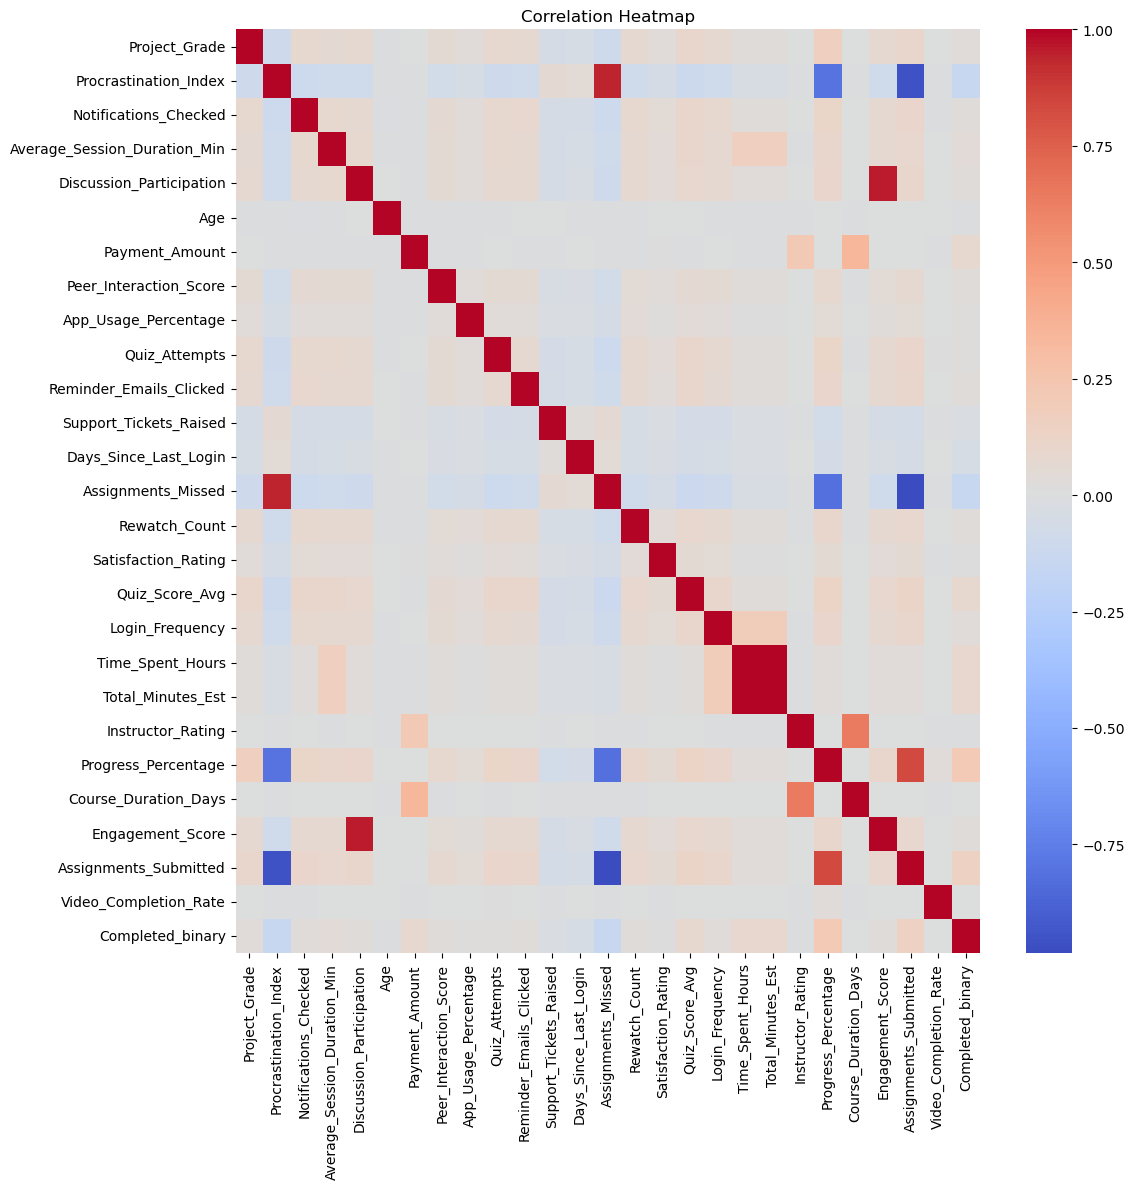

In [11]:
#Only numeric features can be correlated
numeric_df = df_labeled.select_dtypes(include=["int64", "float64"])

#correlation matric
corr_matrix = numeric_df.corr()

corr_matrix

plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()


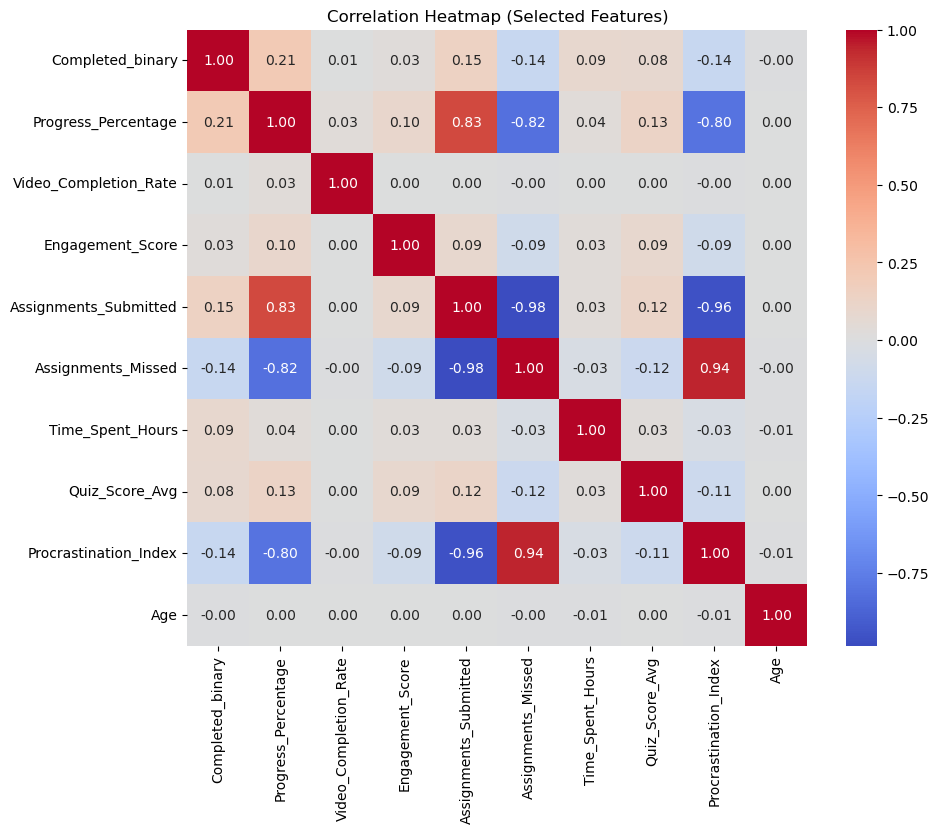

In [12]:
#Here i selected certain columns so that we see more clearly and I printed 
# the percentage on the matrix just like in lab 7
corr_features = [
    "Completed_binary",
    "Progress_Percentage",
    "Video_Completion_Rate",
    "Engagement_Score",
    "Assignments_Submitted",
    "Assignments_Missed",
    "Time_Spent_Hours",
    "Quiz_Score_Avg",
    "Procrastination_Index",
    "Age"
]

corr_subset = df_labeled[corr_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_subset, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Heatmap (Selected Features)")
plt.show()


### 1.c. Make plots to show data distributions

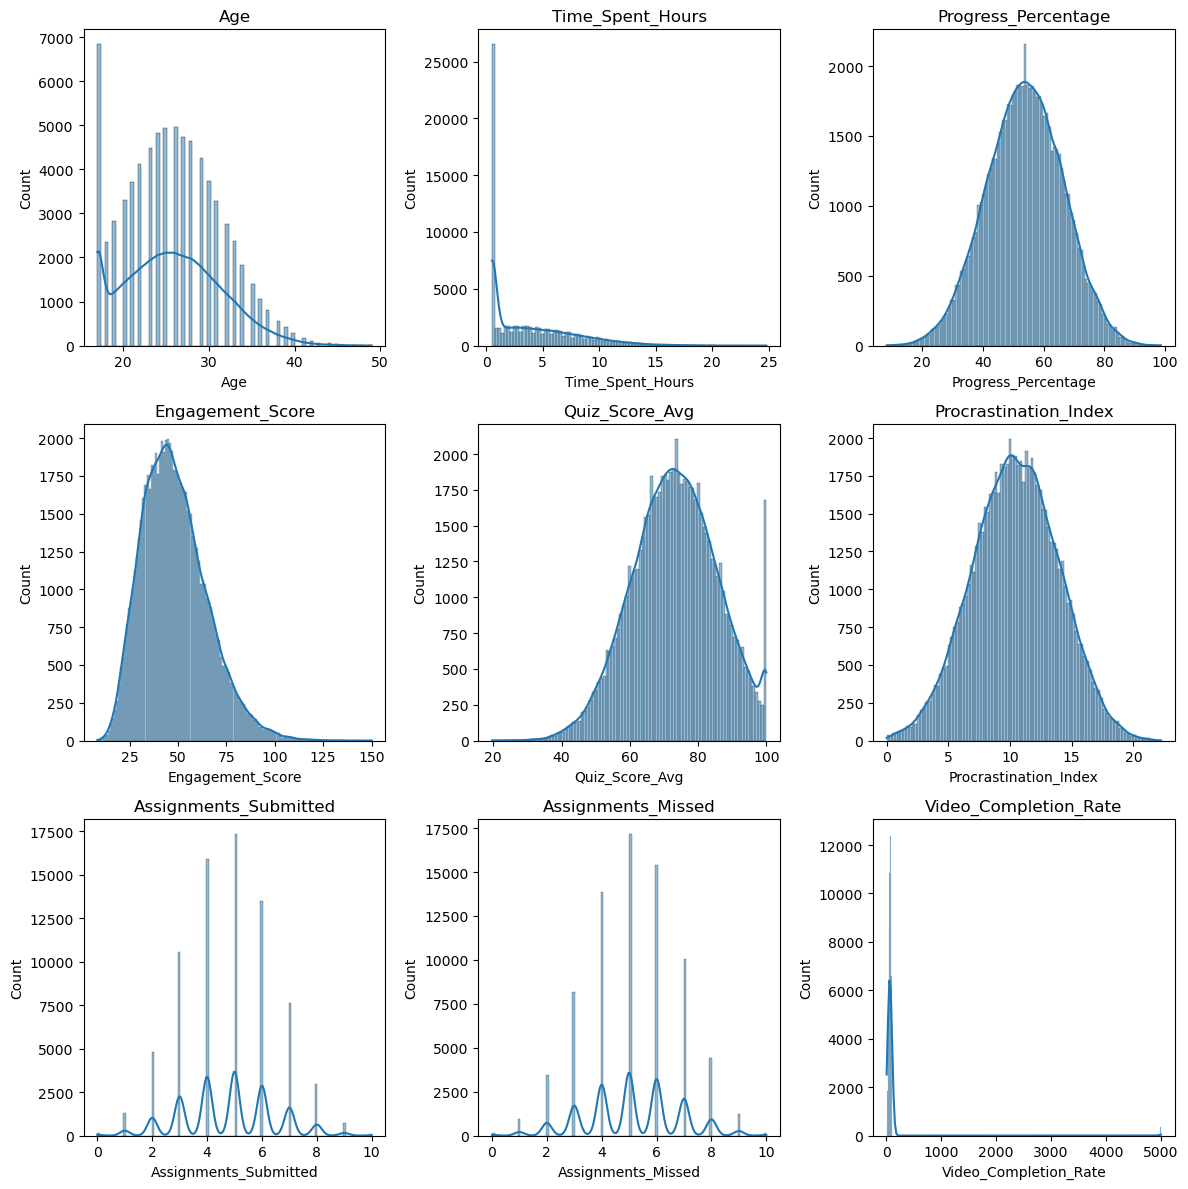

In [13]:
numeric_features = [
    "Age",
    "Time_Spent_Hours",
    "Progress_Percentage",
    "Engagement_Score",
    "Quiz_Score_Avg",
    "Procrastination_Index",
    "Assignments_Submitted",
    "Assignments_Missed",
    "Video_Completion_Rate"
]

plt.figure(figsize=(12, 12))

for i, col in enumerate(numeric_features):
    plt.subplot(3, 3, i+1)
    sns.histplot(data=df_labeled, x=col, kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()


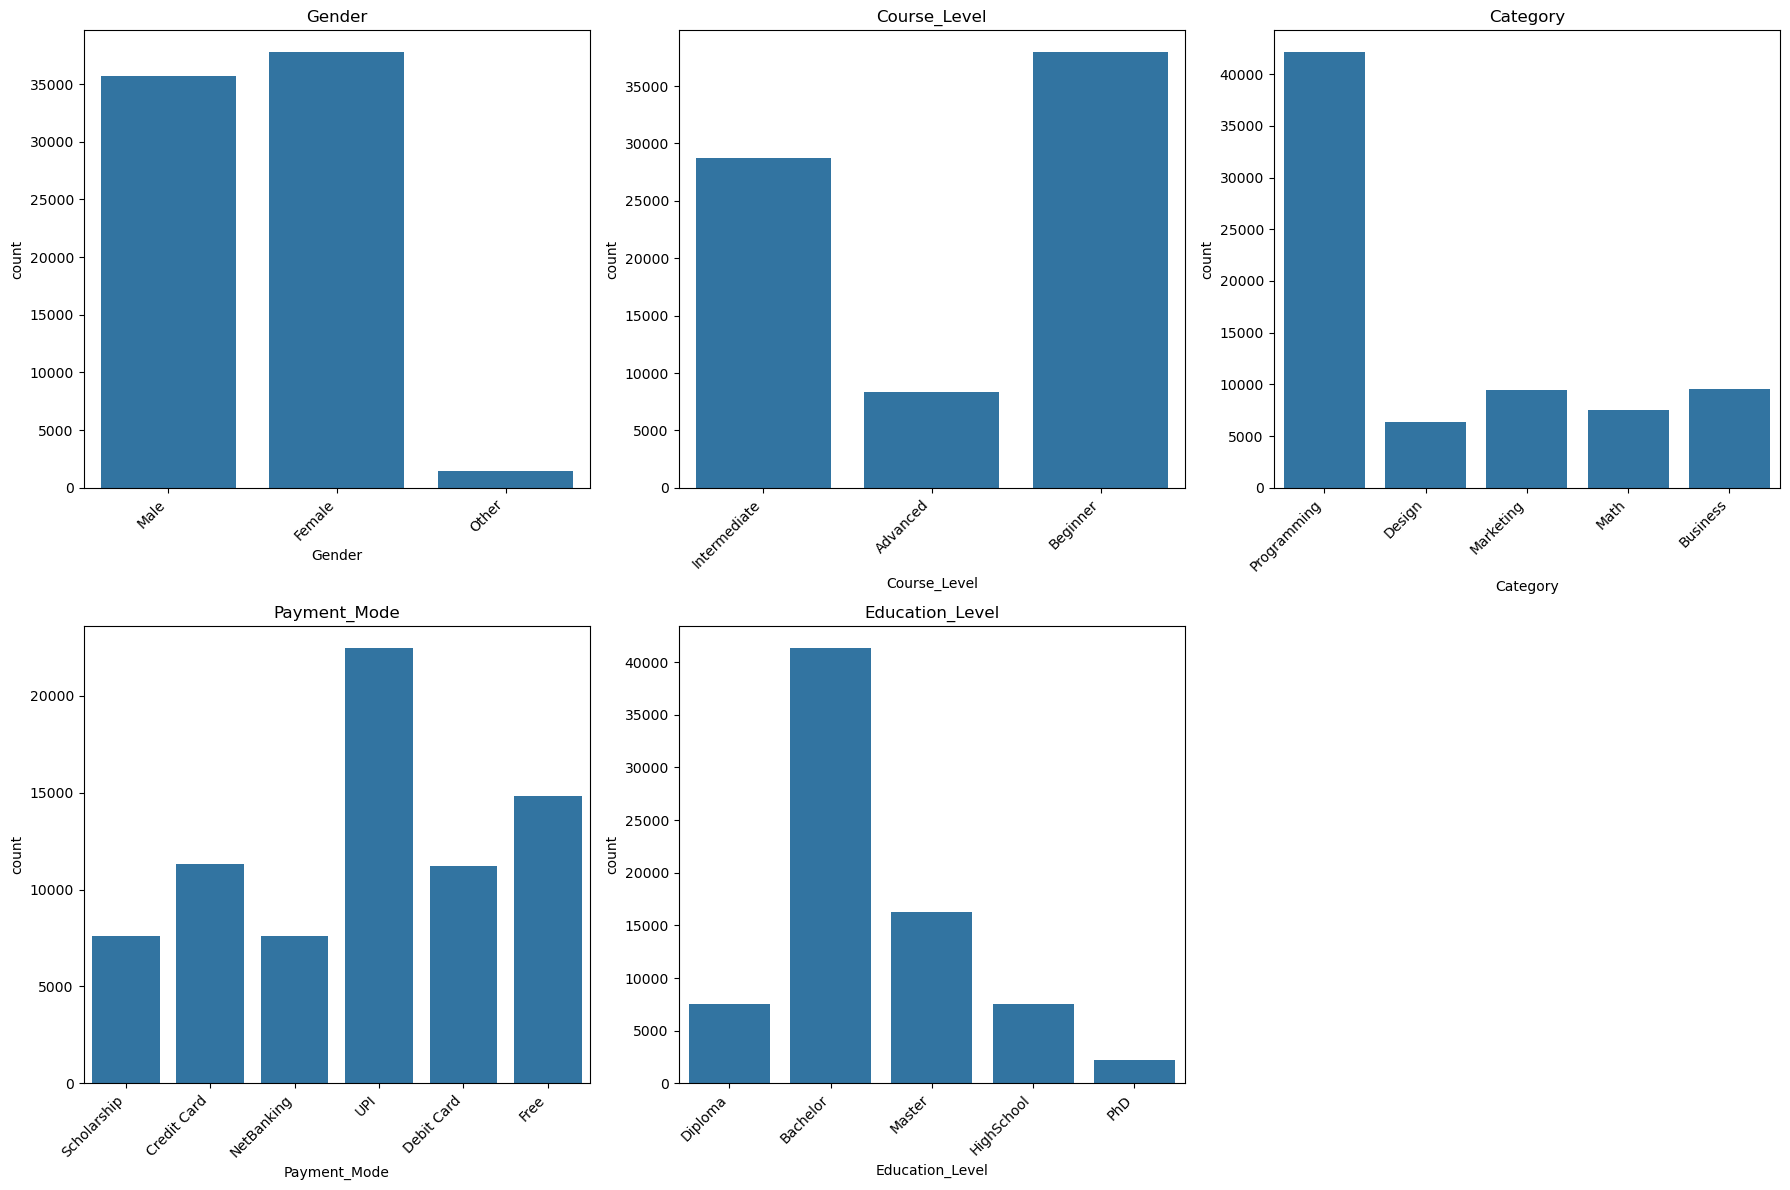

In [14]:
categorical_features = [
    "Gender",
    "Course_Level",
    "Category",
    "Payment_Mode",
    "Education_Level"
]

plt.figure(figsize=(18, 12))

for i, col in enumerate(categorical_features):
    plt.subplot(2, 3, i+1)
    sns.countplot(data=df_labeled, x=col)
    plt.title(col)
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


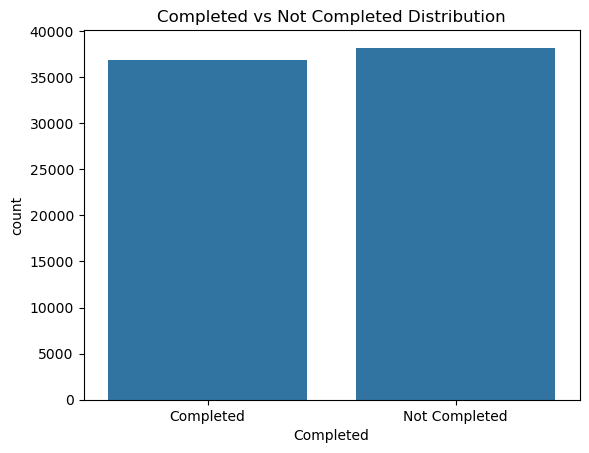

In [15]:
sns.countplot(data=df_labeled, x="Completed")
plt.title("Completed vs Not Completed Distribution")
plt.show()


From the Bar Plot, it's clear that there's an imbalance in the completed vs not-completed entries.

### 1.d. Identify target and feature variables 

In [16]:
df_labeled.head()

id_cols = ["Name", "Student_ID", "Course_ID"]

target_col = "Completed_binary"

feature_cols = [
    c for c in df_labeled.columns
    if c not in id_cols + ["Completed", "Completed_binary"]
]

print("Target column:", target_col)
print("Number of feature columns:", len(feature_cols))
print("\nFirst 10 feature columns:")
print(feature_cols[:10])


Target column: Completed_binary
Number of feature columns: 39

First 10 feature columns:
['Project_Grade', 'Enrollment_Date', 'Procrastination_Index', 'Notifications_Checked', 'Average_Session_Duration_Min', 'Discussion_Participation', 'Age', 'Payment_Amount', 'Peer_Interaction_Score', 'App_Usage_Percentage']


In [17]:
numeric_features = df_labeled[feature_cols].select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = df_labeled[feature_cols].select_dtypes(include=["object"]).columns.tolist()

print("Numeric feature columns (", len(numeric_features), "):")
print(numeric_features)

print("\nCategorical feature columns (", len(categorical_features), "):")
print(categorical_features)


Numeric feature columns ( 26 ):
['Project_Grade', 'Procrastination_Index', 'Notifications_Checked', 'Average_Session_Duration_Min', 'Discussion_Participation', 'Age', 'Payment_Amount', 'Peer_Interaction_Score', 'App_Usage_Percentage', 'Quiz_Attempts', 'Reminder_Emails_Clicked', 'Support_Tickets_Raised', 'Days_Since_Last_Login', 'Assignments_Missed', 'Rewatch_Count', 'Satisfaction_Rating', 'Quiz_Score_Avg', 'Login_Frequency', 'Time_Spent_Hours', 'Total_Minutes_Est', 'Instructor_Rating', 'Progress_Percentage', 'Course_Duration_Days', 'Engagement_Score', 'Assignments_Submitted', 'Video_Completion_Rate']

Categorical feature columns ( 13 ):
['Enrollment_Date', 'Fee_Paid', 'Device_Type', 'Course_Name', 'Gender', 'Discount_Used', 'Internet_Connection_Quality', 'Course_Level', 'Employment_Status', 'Education_Level', 'City', 'Category', 'Payment_Mode']


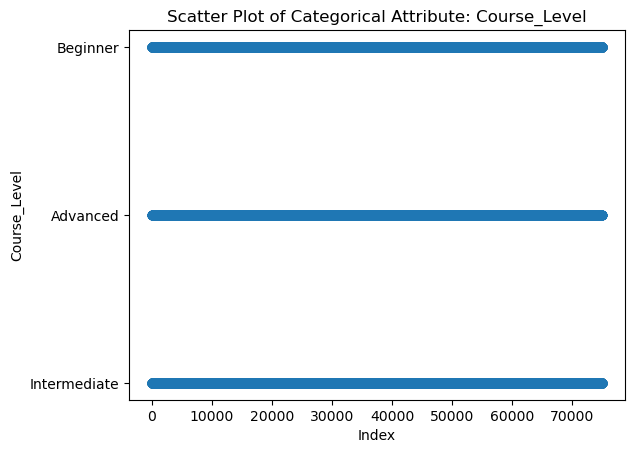

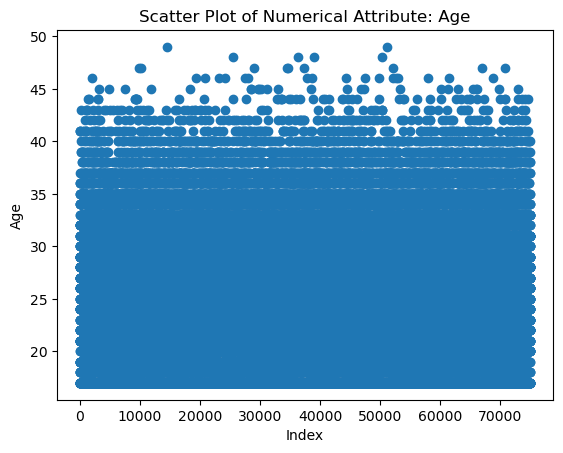

In [18]:
# Example categorical attribute (string type)
plt.scatter(range(len(df_labeled)), df_labeled["Course_Level"])
plt.title("Scatter Plot of Categorical Attribute: Course_Level")
plt.xlabel("Index")
plt.ylabel("Course_Level")
plt.show()

# Example numerical attribute
plt.scatter(range(len(df_labeled)), df_labeled["Age"])
plt.title("Scatter Plot of Numerical Attribute: Age")
plt.xlabel("Index")
plt.ylabel("Age")
plt.show()


e. Highlight potential issues in the Data 

In [19]:
# 1. Missing values per column
print("Missing values per column (top 15):")
print(df.isna().sum().sort_values(ascending=False).head(15))

print("\nCompleted value counts (including NaN):")
print(df["Completed"].value_counts(dropna=False))

# 2. Class balance on labeled data
print("\nLabeled data target distribution:")
print(df_labeled["Completed"].value_counts())

print("\nLabeled data target proportion (binary):")
print(df_labeled["Completed_binary"].value_counts(normalize=True))


Missing values per column (top 15):
Completed                       25000
Peer_Interaction_Score           9315
Device_Type                      8661
Internet_Connection_Quality      8534
Days_Since_Last_Login            7472
City                             5443
Procrastination_Index               0
Enrollment_Date                     0
Project_Grade                       0
Notifications_Checked               0
Name                                0
Payment_Amount                      0
Age                                 0
Discussion_Participation            0
Average_Session_Duration_Min        0
dtype: int64

Completed value counts (including NaN):
Completed
Not Completed    38193
Completed        36807
NaN              25000
Name: count, dtype: int64

Labeled data target distribution:
Completed
Not Completed    38193
Completed        36807
Name: count, dtype: int64

Labeled data target proportion (binary):
Completed_binary
0    0.50924
1    0.49076
Name: proportion, dtype: float64


1.e. Observations about potential issues in the dataset

When I look at the missing values and the target distribution, I notice a few important problems that I need to keep in mind for the next steps:

- The `Completed` column has around twenty five thousand missing values. This means that a very large part of the dataset does not have a label. I cannot use those rows directly for supervised learning, because the model needs to know whether each student completed the course or not during training. I either have to ignore these rows when I train the model or find another way to make use of them later.

- There are also several other columns with thousands of missing values. These features are less central than the target column, but they can still be useful. For these, I will probably need to decide on a strategy such as filling in the missing values with simple statistics or dropping the columns or rows if the missing part is too large.

- The target `Completed` has a small imbalance between completed and not completed students. One class is somewhat more frequent than the other. The imbalance is not extreme, but it can still affect how the model learns. If I ignore this, the model might become slightly biased towards the majority class and might perform worse on the minority class. Later I may consider techniques that pay more attention to the less frequent class.


### 2) Data preprocessing – 2 p 

a. Identify outliers 

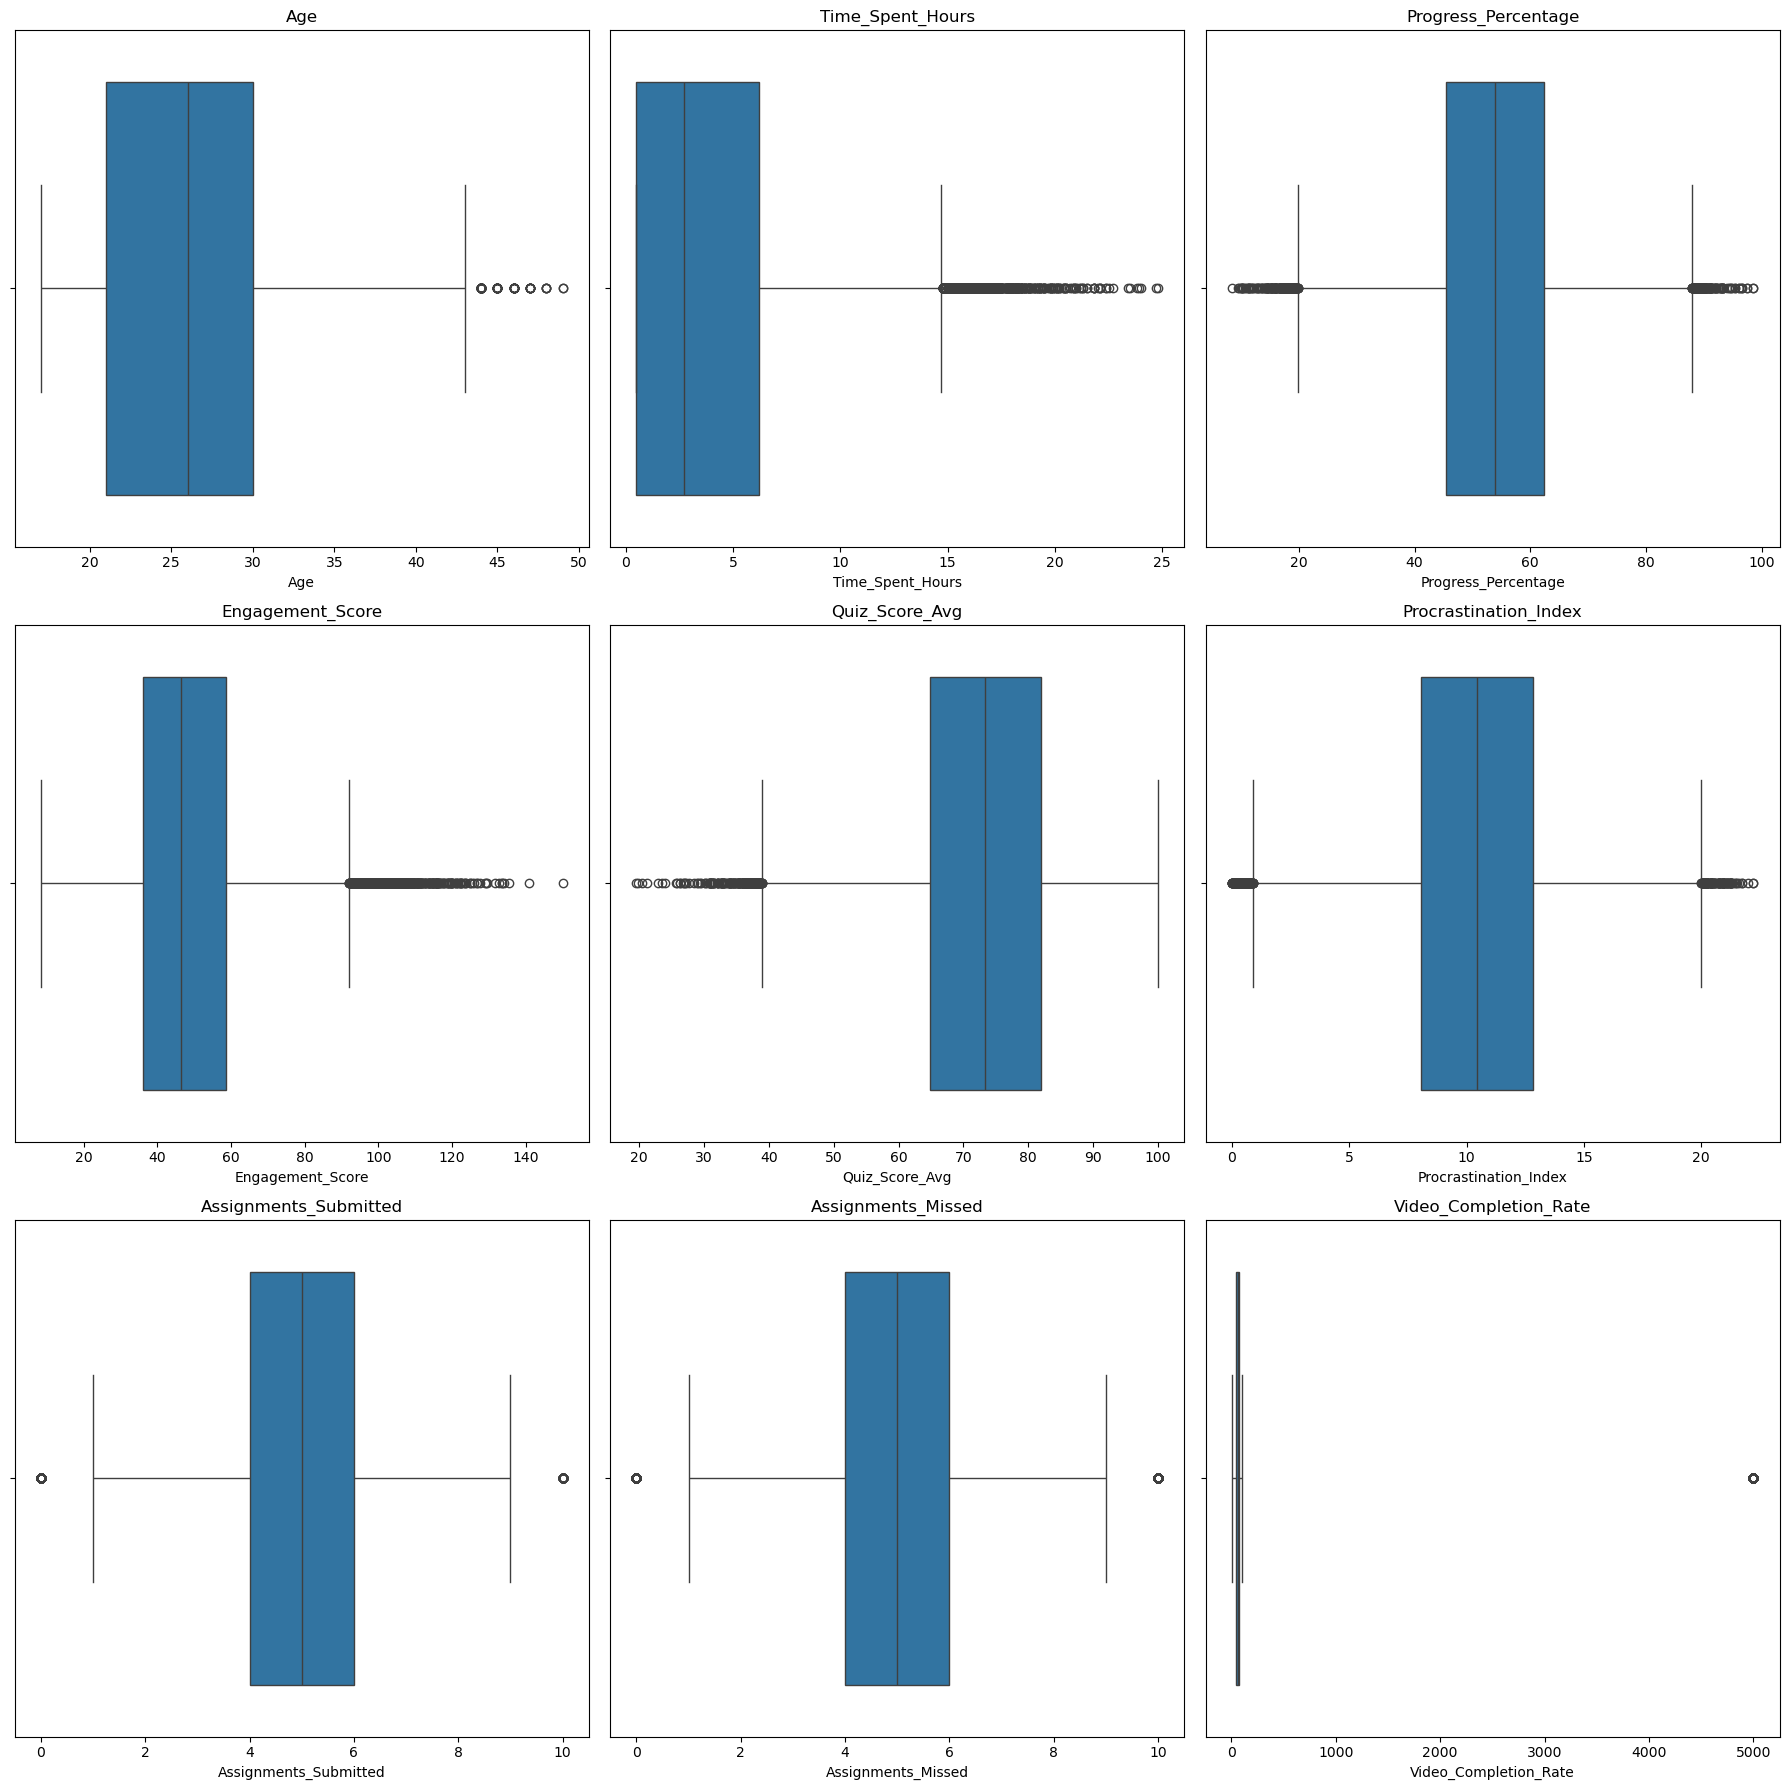

In [ ]:
numeric_for_outliers = [
    "Age",
    "Time_Spent_Hours",
    "Progress_Percentage",
    "Engagement_Score",
    "Quiz_Score_Avg",
    "Procrastination_Index",
    "Assignments_Submitted",
    "Assignments_Missed",
]

plt.figure(figsize=(18, 18))

for i, col in enumerate(numeric_for_outliers):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df_labeled[col])
    plt.title(col)

plt.tight_layout()
plt.show()


b. Deal with missing values

In [35]:
# I will fill the numeric values with the median &
# I will fill the categorical with th emost frequent value

X = df_labeled[feature_cols].copy()
y = df_labeled[target_col].copy()


print("Missing values BEFORE:", X.isna().sum().sum())

numeric_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X.select_dtypes(include=["object"]).columns.tolist()

# Step 4: Create new dataset without missing values
X_after = X.copy()

# Fill numeric columns → median
for col in numeric_features:
    X_after[col].fillna(X_after[col].median(), inplace=True)

# Fill categorical columns → most frequent category (mode)
for col in categorical_features:
    X_after[col].fillna(X_after[col].mode()[0], inplace=True)
print(f"Categorical features: {categorical_features}")
# Step 5: Verify
print("Missing values AFTER:", X_after.isna().sum().sum())




Missing values BEFORE: 29638
Categorical features: ['Enrollment_Date', 'Fee_Paid', 'Device_Type', 'Course_Name', 'Gender', 'Discount_Used', 'Internet_Connection_Quality', 'Course_Level', 'Employment_Status', 'Education_Level', 'City', 'Category', 'Payment_Mode']
Missing values AFTER: 0


/tmp/ipykernel_126128/3451961283.py:18: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/tmp/ipykernel_126128/3451961283.py:18: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=Tru

c. Deal with categorical data 

In [22]:
X_encoded = pd.get_dummies(X_after, columns=categorical_features, drop_first=True)

print("Shape before encoding:", X_after.shape)
print("Shape after encoding:", X_encoded.shape)

X_encoded.head()


Shape before encoding: (75000, 39)
Shape after encoding: (75000, 793)


,Project_Grade,Procrastination_Index,Notifications_Checked,Average_Session_Duration_Min,Discussion_Participation,Age,Payment_Amount,Peer_Interaction_Score,App_Usage_Percentage,Quiz_Attempts,...,City_Vadodara,Category_Design,Category_Marketing,Category_Math,Category_Programming,Payment_Mode_Debit Card,Payment_Mode_Free,Payment_Mode_NetBanking,Payment_Mode_Scholarship,Payment_Mode_UPI
0,71.2,2.44,6,30.0,2,19,1740,4.3,49,5,...,False,False,False,False,True,False,False,False,True,False
1,42.5,12.64,5,37.0,2,17,6147,7.8,86,3,...,False,False,False,False,True,False,False,False,False,False
2,87.9,3.46,5,9.0,3,34,4280,6.7,85,3,...,False,False,False,False,True,False,False,True,False,False
3,51.4,20.00,9,27.0,1,29,3812,6.4,42,4,...,False,True,False,False,False,False,False,False,False,True
4,93.0,9.28,7,36.0,1,19,5486,7.5,91,8,...,False,False,False,False,True,True,False,False,False,False


d. Standardize or normalize numerical features as needed

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled_array = scaler.fit_transform(X_encoded)

X_scaled = pd.DataFrame(X_scaled_array, columns=X_encoded.columns, index=X_encoded.index)

print("Shape of X_encoded:", X_encoded.shape)
print("Shape of X_scaled:", X_scaled.shape)
X_scaled.head()


Shape of X_encoded: (75000, 793)
Shape of X_scaled: (75000, 793)


,Project_Grade,Procrastination_Index,Notifications_Checked,Average_Session_Duration_Min,Discussion_Participation,Age,Payment_Amount,Peer_Interaction_Score,App_Usage_Percentage,Quiz_Attempts,...,City_Vadodara,Category_Design,Category_Marketing,Category_Math,Category_Programming,Payment_Mode_Debit Card,Payment_Mode_Free,Payment_Mode_NetBanking,Payment_Mode_Scholarship,Payment_Mode_UPI
0,0.197385,-2.305784,0.317952,-0.372235,-0.206777,-1.195413,-0.725710,-1.057813,-0.986226,0.608192,...,-0.258771,-0.30369,-0.380242,-0.334591,0.883339,-0.418809,-0.496331,-0.335822,2.980609,-0.654134
1,-1.683105,0.631820,-0.097505,0.303337,-0.206777,-1.551390,1.389945,0.803066,0.950723,-0.380920,...,-0.258771,-0.30369,-0.380242,-0.334591,0.883339,-0.418809,-0.496331,-0.335822,-0.335502,-0.654134
2,1.291607,-2.012024,-0.097505,-2.398949,0.419998,1.474418,0.493660,0.218218,0.898373,-0.380920,...,-0.258771,-0.30369,-0.380242,-0.334591,0.883339,-0.418809,-0.496331,2.977771,-0.335502,-0.654134
3,-1.099957,2.751503,1.564324,-0.661765,-0.833552,0.584475,0.268989,0.058714,-1.352676,0.113636,...,-0.258771,3.29283,-0.380242,-0.334591,-1.132068,-0.418809,-0.496331,-0.335822,-0.335502,1.528738
4,1.625770,-0.335861,0.733409,0.206827,-0.833552,-1.195413,1.072621,0.643562,1.212473,2.091859,...,-0.258771,-0.30369,-0.380242,-0.334591,0.883339,2.387722,-0.496331,-0.335822,-0.335502,-0.654134


e. Use principal component analysis (PCA) 

In [24]:
from sklearn.decomposition import PCA

# PCA with 3 components
pca3 = PCA(n_components=3)
X_pca3 = pca3.fit_transform(X_scaled)

# PCA with 2 components
pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X_scaled)

print("Explained variance ratio (3 components):", pca3.explained_variance_ratio_)
print("Explained variance ratio (2 components):", pca2.explained_variance_ratio_)


Explained variance ratio (3 components): [0.00598646 0.00503501 0.00384393]
Explained variance ratio (2 components): [0.00598646 0.00503501]


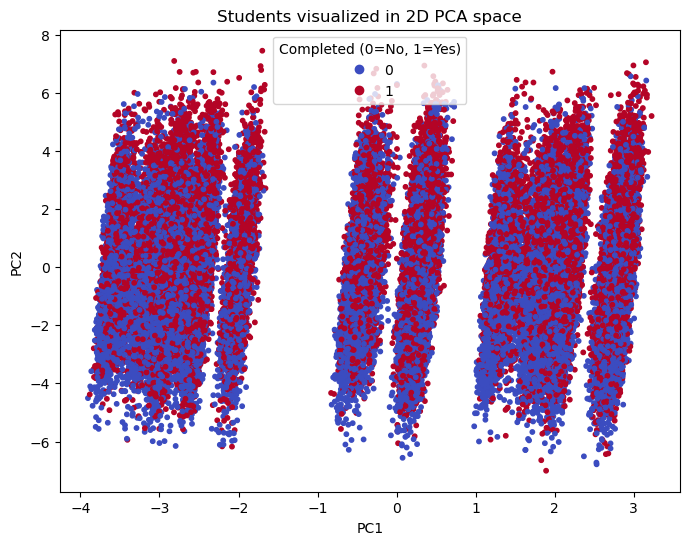

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Color by completed / not completed
# (y is Completed_binary from earlier: 1 = Completed, 0 = Not Completed)
scatter = plt.scatter(X_pca2[:, 0], X_pca2[:, 1], c=y, s=10, cmap="coolwarm")

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Students visualized in 2D PCA space")
plt.legend(*scatter.legend_elements(), title="Completed (0=No, 1=Yes)")
plt.show()


In [26]:
import plotly.express as px
import pandas as pd

df_pca3 = pd.DataFrame(X_pca3, columns=["PC1", "PC2", "PC3"])
df_pca3["Completed"] = y.values

fig = px.scatter_3d(
    df_pca3, x="PC1", y="PC2", z="PC3",
    color="Completed", opacity=0.8
)

fig.update_layout(title="Students visualized in 3D PCA space")
fig.show()


3) Propose and test 2 different methods that deal with data imbalance (e.g. SMOTE, ADASYN, 
undersampling, etc.) – 1 p

In [27]:
# y is Completed_binary for labeled data
print("Original class distribution:")
print(y.value_counts())
print("\nOriginal class distribution (proportions):")
print(y.value_counts(normalize=True))


Original class distribution:
Completed_binary
0    38193
1    36807
Name: count, dtype: int64

Original class distribution (proportions):
Completed_binary
0    0.50924
1    0.49076
Name: proportion, dtype: float64


In [28]:
import numpy as np

# Indices of each class
idx_class0 = y[y == 0].index
idx_class1 = y[y == 1].index

print("Number of class 0 (Not Completed):", len(idx_class0))
print("Number of class 1 (Completed):", len(idx_class1))

# Choose minority size
minority_size = min(len(idx_class0), len(idx_class1))

# Randomly sample from each class to have the same count
np.random.seed(42)
idx_class0_under = np.random.choice(idx_class0, size=minority_size, replace=False)
idx_class1_under = np.random.choice(idx_class1, size=minority_size, replace=False)

# Combine indices and shuffle
idx_undersampled = np.concatenate([idx_class0_under, idx_class1_under])
np.random.shuffle(idx_undersampled)

X_under = X_scaled.loc[idx_undersampled]
y_under = y.loc[idx_undersampled]

print("\nAfter random undersampling:")
print(y_under.value_counts())
print("\nProportions after undersampling:")
print(y_under.value_counts(normalize=True))


Number of class 0 (Not Completed): 38193
Number of class 1 (Completed): 36807

After random undersampling:
Completed_binary
1    36807
0    36807
Name: count, dtype: int64

Proportions after undersampling:
Completed_binary
1    0.5
0    0.5
Name: proportion, dtype: float64


In [29]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_smote, y_smote = smote.fit_resample(X_scaled, y)

print("After SMOTE oversampling:")
print(y_smote.value_counts())
print("\nProportions after SMOTE:")
print(y_smote.value_counts(normalize=True))


After SMOTE oversampling:
Completed_binary
1    38193
0    38193
Name: count, dtype: int64

Proportions after SMOTE:
Completed_binary
1    0.5
0    0.5
Name: proportion, dtype: float64


4) Test out 5 different ML methods and print out all performance metrics (Recall, Precision, 
Accuracy, F1). Test the performance of Voting Classifier which combines predictions from multiple 
models – 4p 

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import LinearSVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# We use the SMOTE-balanced dataset
X_model = X_smote
y_model = y_smote

# Train-test split (same as lab)
X_train, X_test, y_train, y_test = train_test_split(
    X_model, y_model,
    test_size=0.2,
    random_state=42,
    stratify=y_model
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (61108, 793)
Test shape: (15278, 793)


In [31]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Linear SVC": LinearSVC(max_iter=5000, random_state=42)
}


In [32]:
results_list = []

for name, model in models.items():
    print("="*60)
    print(f"Training model: {name}")
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1-score : {f1:.4f}")
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    results_list.append([name, acc, prec, rec, f1])

# Summary table (lab style)
results_df = pd.DataFrame(results_list, columns=["Model", "Accuracy", "Precision", "Recall", "F1-score"])
results_df


Training model: Logistic Regression
Accuracy : 0.5943
Precision: 0.5939
Recall   : 0.5960
F1-score : 0.5950

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.59      0.59      7639
           1       0.59      0.60      0.59      7639

    accuracy                           0.59     15278
   macro avg       0.59      0.59      0.59     15278
weighted avg       0.59      0.59      0.59     15278

Training model: KNN
Accuracy : 0.5278
Precision: 0.5261
Recall   : 0.5617
F1-score : 0.5433

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.49      0.51      7639
           1       0.53      0.56      0.54      7639

    accuracy                           0.53     15278
   macro avg       0.53      0.53      0.53     15278
weighted avg       0.53      0.53      0.53     15278

Training model: Decision Tree
Accuracy : 0.5507
Precision: 0.5507
Recall   : 0.5506
F1-score : 0.5

,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.594253,0.593921,0.596020,0.594969
1,KNN,0.527818,0.526051,0.561723,0.543302
2,Decision Tree,0.550661,0.550668,0.550596,0.550632
3,Random Forest,0.601257,0.603037,0.592617,0.597782
4,Linear SVC,0.594253,0.593652,0.597460,0.595550


In [33]:
voting_estimators = [
    ("lr", LogisticRegression(max_iter=2000)),
    ("rf", RandomForestClassifier(n_estimators=100, random_state=42)),
    ("svc", LinearSVC(max_iter=5000, random_state=42))
]

voting_clf = VotingClassifier(estimators=voting_estimators, voting="hard")

print("="*60)
print("Training Voting Classifier...")
voting_clf.fit(X_train, y_train)

y_pred_v = voting_clf.predict(X_test)

acc_v = accuracy_score(y_test, y_pred_v)
prec_v = precision_score(y_test, y_pred_v)
rec_v = recall_score(y_test, y_pred_v)
f1_v = f1_score(y_test, y_pred_v)

print(f"Voting Accuracy : {acc_v:.4f}")
print(f"Voting Precision: {prec_v:.4f}")
print(f"Voting Recall   : {rec_v:.4f}")
print(f"Voting F1-score : {f1_v:.4f}")

print("\nClassification Report (Voting Classifier):")
print(classification_report(y_test, y_pred_v))

# Add voting classifier result to summary table
results_df.loc[len(results_df)] = ["Voting Classifier", acc_v, prec_v, rec_v, f1_v]
results_df


Training Voting Classifier...
Voting Accuracy : 0.5944
Voting Precision: 0.5939
Voting Recall   : 0.5969
Voting F1-score : 0.5954

Classification Report (Voting Classifier):
              precision    recall  f1-score   support

           0       0.59      0.59      0.59      7639
           1       0.59      0.60      0.60      7639

    accuracy                           0.59     15278
   macro avg       0.59      0.59      0.59     15278
weighted avg       0.59      0.59      0.59     15278



,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.594253,0.593921,0.596020,0.594969
1,KNN,0.527818,0.526051,0.561723,0.543302
2,Decision Tree,0.550661,0.550668,0.550596,0.550632
3,Random Forest,0.601257,0.603037,0.592617,0.597782
4,Linear SVC,0.594253,0.593652,0.597460,0.595550
5,Voting Classifier,0.594384,0.593905,0.596937,0.595417


6) Use k-fold cross validation to prove robustness - 1p 

In [34]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score

# 5-fold
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Models to test
models_for_cv = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Custom scorers (lab style)
scoring = {
    "accuracy": make_scorer(accuracy_score),
    "precision": make_scorer(precision_score),
    "recall": make_scorer(recall_score),
    "f1": make_scorer(f1_score)
}

for model_name, model in models_for_cv.items():
    print("="*60)
    print(f"Cross Validation Results for {model_name}")
    
    for metric_name, metric_scorer in scoring.items():
        cv_scores = cross_val_score(model, X_for_models, y_for_models,
                                    cv=kfold, scoring=metric_scorer)
        
        print(f"{metric_name.capitalize()} : mean={cv_scores.mean():.4f}, std={cv_scores.std():.4f}")


Cross Validation Results for Logistic Regression


NameError: name 'X_for_models' is not defined